In [229]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from pandas.api.types import is_numeric_dtype
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import sys

In [230]:
# Loading the dataset and displaying the first few rows of the dataset
DCCC = pd.read_csv('Default-of-Credit-Card-clients.csv',header=[0,1])
DCCC.head()

Unnamed: 0_level_0        X1  X2        X3       X4  X5    X6    X7    X8  \
                  ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3   
0                  1     20000   2         2        1  24     2     2    -1   
1                  2    120000   2         2        2  26    -1     2     0   
2                  3     90000   2         2        2  34     0     0     0   
3                  4     50000   2         2        1  37     0     0     0   
4                  5     50000   1         2        1  57    -1     0    -1   

     X9  ...       X15       X16       X17      X18      X19      X20  \
  PAY_4  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3   
0    -1  ...         0         0         0        0      689        0   
1     0  ...      3272      3455      3261        0     1000     1000   
2     0  ...     14331     14948     15549     1518     1500     1000   
3     0  ...     28314     28959     29547     2000     2019     1200   
4     0  ...     20940     19146     19131     2000    36681    10000   

       X21      X22      X23                          Y  
  PAY_AMT4 PAY_AMT5 PAY_AMT6 default payment next month  
0        0        0        0                          1  
1     1000        0     2000                          1  
2     1000     1000     5000                          0  
3     1100     1069     1000                          0  
4     9000      689      679                          0  

[5 rows x 25 columns]

In [231]:
# In question asked to select specific columns from the dataset (X12-X17)
Data_Attributes = DCCC[['X12','X13','X14','X15','X16','X17']]

In [232]:
#calculate its average, standard deviation, minimum, and maximum values
for c in Data_Attributes.columns:
    if is_numeric_dtype(Data_Attributes[c]):
        print('\n',c)
        print('The_Mean_is = %.4f' % Data_Attributes[c].mean())
        print('The_S_D_is = %.4f' % Data_Attributes[c].std())
        print('The_Minimum_is = %.4f' % Data_Attributes[c].min())
        print('The_Maximum_is = %.4f' % Data_Attributes[c].max())
        print('______________________________________________________________________')


 ('X12', 'BILL_AMT1')
The_Mean_is = 51223.3309
The_S_D_is = 73635.8606
The_Minimum_is = -165580.0000
The_Maximum_is = 964511.0000
______________________________________________________________________

 ('X13', 'BILL_AMT2')
The_Mean_is = 49179.0752
The_S_D_is = 71173.7688
The_Minimum_is = -69777.0000
The_Maximum_is = 983931.0000
______________________________________________________________________

 ('X14', 'BILL_AMT3')
The_Mean_is = 47013.1548
The_S_D_is = 69349.3874
The_Minimum_is = -157264.0000
The_Maximum_is = 1664089.0000
______________________________________________________________________

 ('X15', 'BILL_AMT4')
The_Mean_is = 43262.9490
The_S_D_is = 64332.8561
The_Minimum_is = -170000.0000
The_Maximum_is = 891586.0000
______________________________________________________________________

 ('X16', 'BILL_AMT5')
The_Mean_is = 40311.4010
The_S_D_is = 60797.1558
The_Minimum_is = -81334.0000
The_Maximum_is = 927171.0000
______________________________________________________________

In [233]:
# Calculate and display the Covariance matrix
print('The Covariance is:')
Data_Attributes.cov()

The Covariance is:


X12           X13           X14           X15  \
                  BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4   
X12 BILL_AMT1  5.422240e+09  4.986670e+09  4.556511e+09  4.075286e+09   
X13 BILL_AMT2  4.986670e+09  5.065705e+09  4.582086e+09  4.086508e+09   
X14 BILL_AMT3  4.556511e+09  4.582086e+09  4.809338e+09  4.122238e+09   
X15 BILL_AMT4  4.075286e+09  4.086508e+09  4.122238e+09  4.138716e+09   
X16 BILL_AMT5  3.714795e+09  3.720401e+09  3.726780e+09  3.677105e+09   
X17 BILL_AMT6  3.519876e+09  3.524868e+09  3.524247e+09  3.451762e+09   

                        X16           X17  
                  BILL_AMT5     BILL_AMT6  
X12 BILL_AMT1  3.714795e+09  3.519876e+09  
X13 BILL_AMT2  3.720401e+09  3.524868e+09  
X14 BILL_AMT3  3.726780e+09  3.524247e+09  
X15 BILL_AMT4  3.677105e+09  3.451762e+09  
X16 BILL_AMT5  3.696294e+09  3.425914e+09  
X17 BILL_AMT6  3.425914e+09  3.546692e+09

In [234]:
# Calculate and display the Correlation matrix
print('The Correlation is')
Data_Attributes.corr()

The Correlation is


X12       X13       X14       X15       X16       X17
              BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6
X12 BILL_AMT1  1.000000  0.951484  0.892279  0.860272  0.829779  0.802650
X13 BILL_AMT2  0.951484  1.000000  0.928326  0.892482  0.859778  0.831594
X14 BILL_AMT3  0.892279  0.928326  1.000000  0.923969  0.883910  0.853320
X15 BILL_AMT4  0.860272  0.892482  0.923969  1.000000  0.940134  0.900941
X16 BILL_AMT5  0.829779  0.859778  0.883910  0.940134  1.000000  0.946197
X17 BILL_AMT6  0.802650  0.831594  0.853320  0.900941  0.946197  1.000000

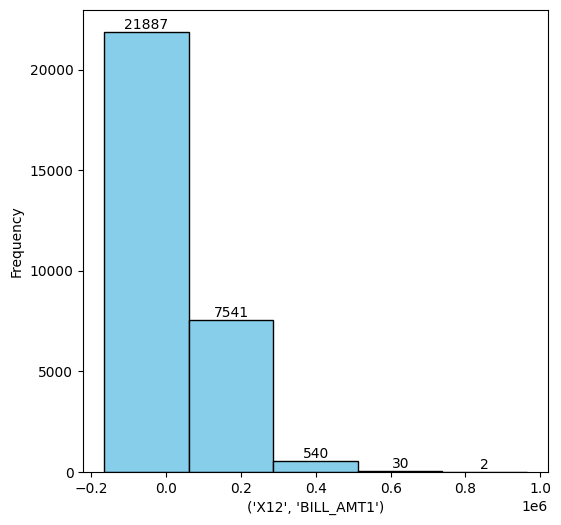

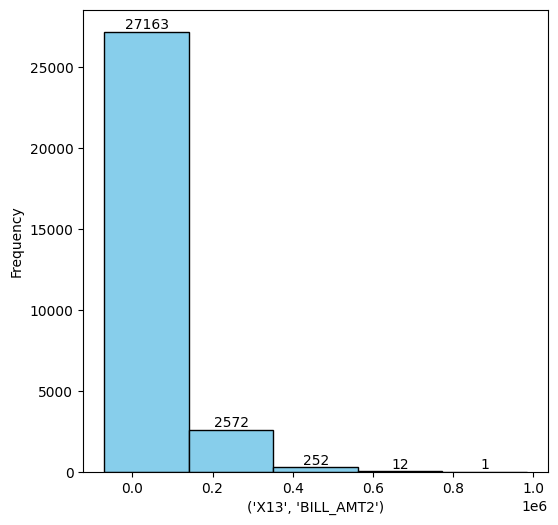

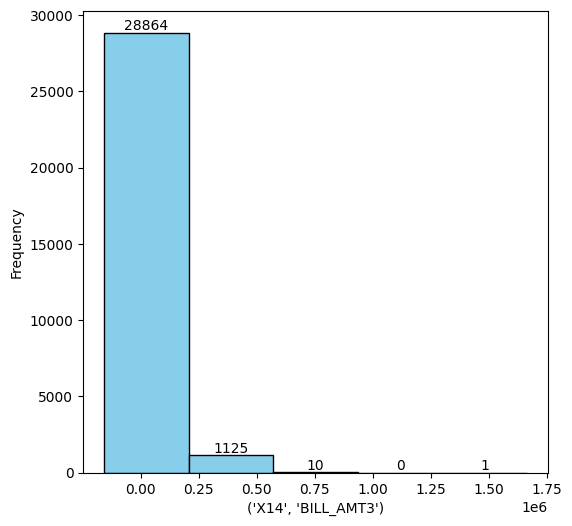

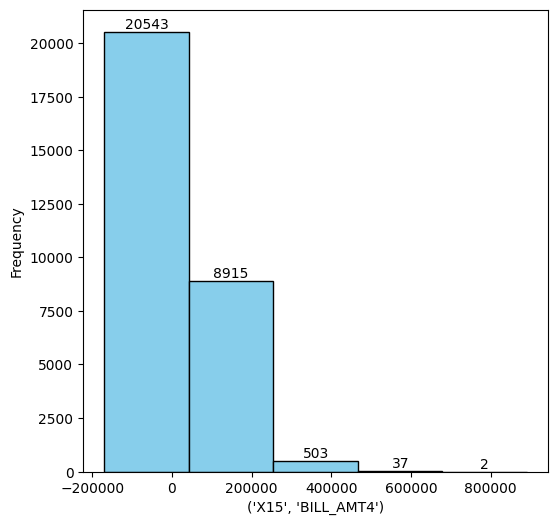

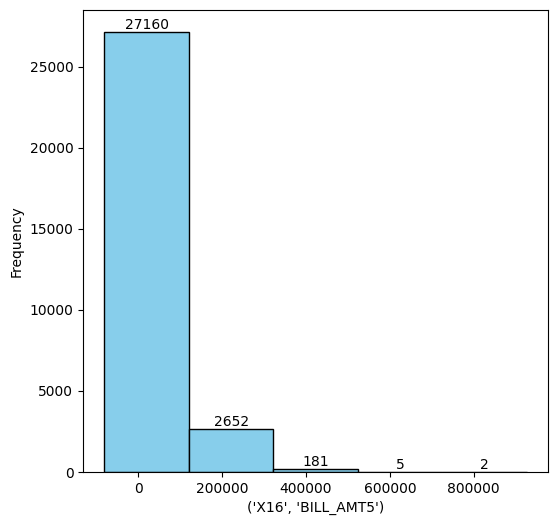

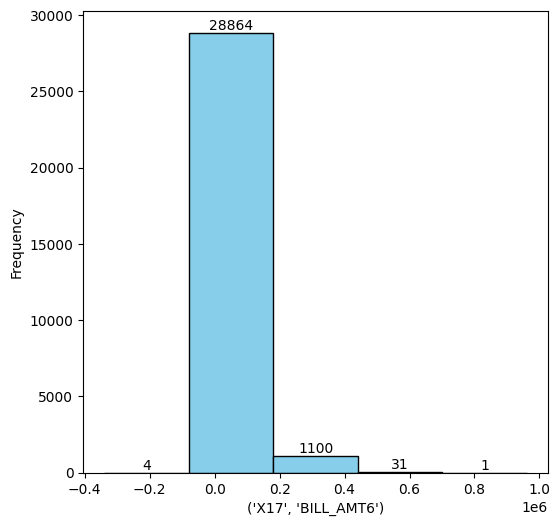

In [235]:
# Creating the histograms for each numeric column and used the seperate 5 bins
for hist in Data_Attributes.columns:
    Fig, Ax = plt.subplots(figsize=(6, 6))
    B = Ax.hist(Data_Attributes[hist], bins=5, color='skyblue', edgecolor='black')
    Ax.bar_label(B[2], fmt='%d')
    Ax.set_ylabel('Frequency')
    Ax.set_xlabel(hist)
    plt.show()

Boxplot


<Axes: >

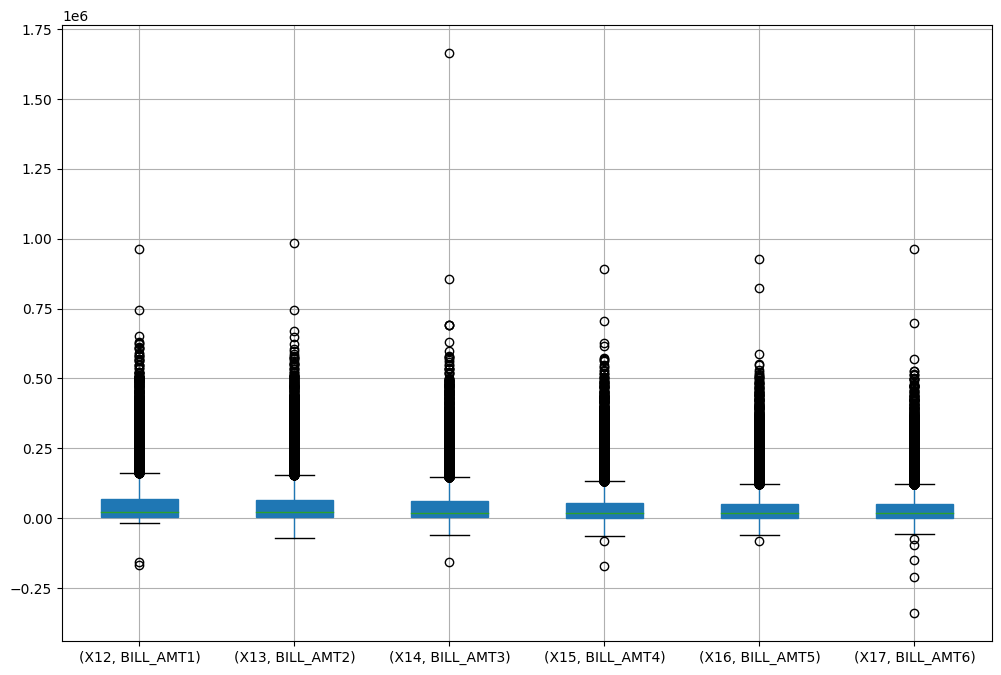

In [236]:
# Creating boxplots for the data
print("Boxplot")
Data_Attributes.boxplot(figsize=(12,8), patch_artist=True)
#It seems like all the attributes has some outliers, Compared to other attributes, x14 has a far outlier.

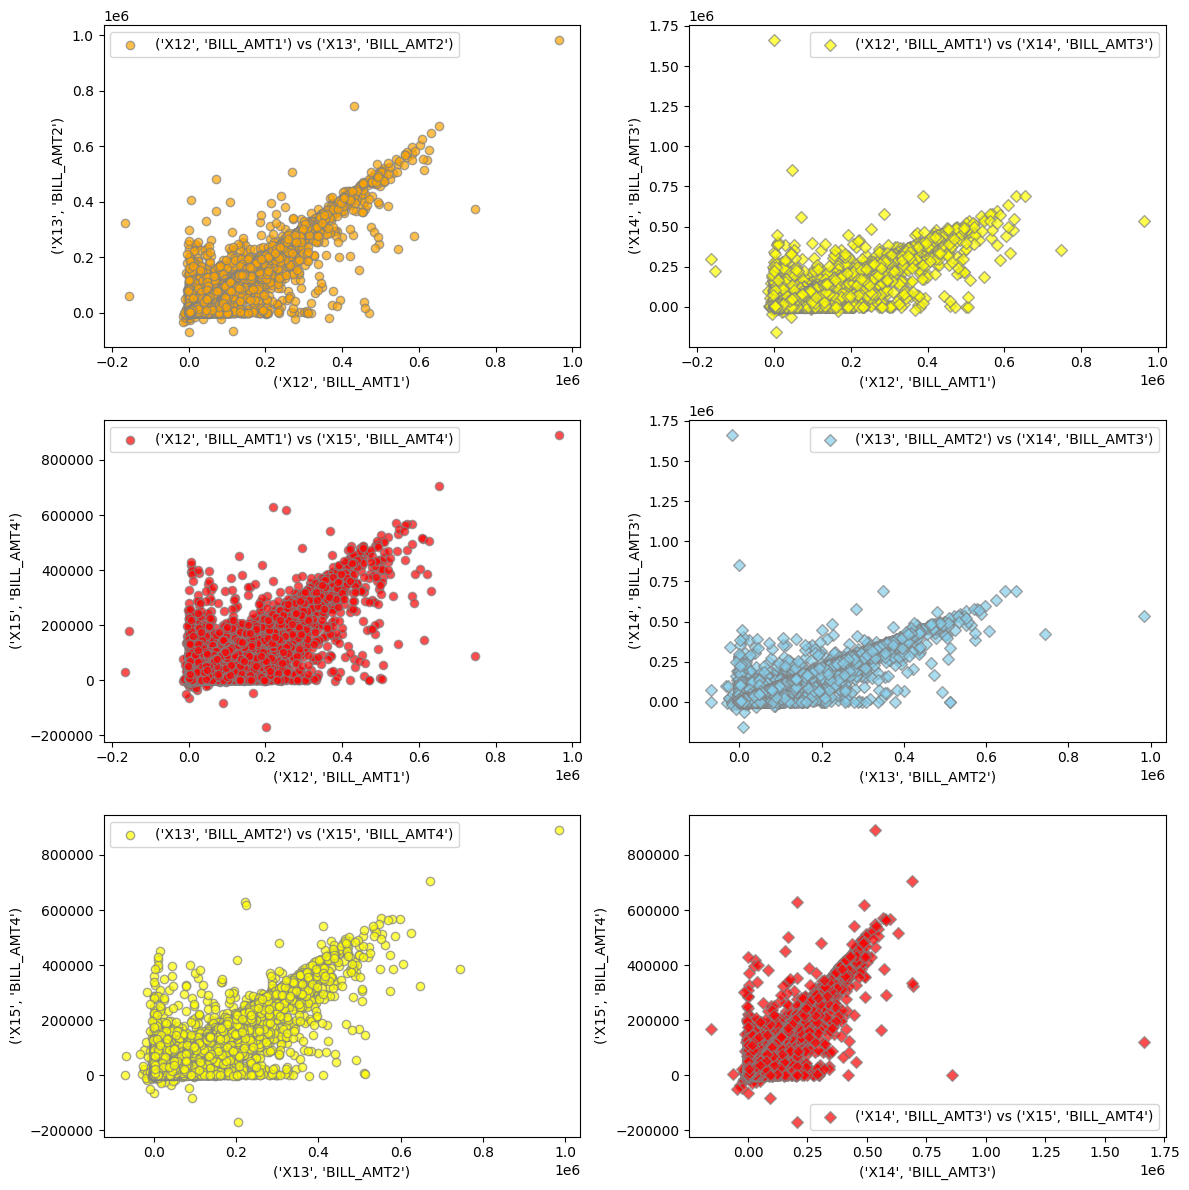

In [237]:
# Creating the scatter plots for the pairs of columns
#It seems like all the attributes are positively correlated.
Fig, Ax = plt.subplots(3, 2, figsize=(12, 12))
inx = 0
markers = ['o', 'D']
colors = ['orange', 'yellow', 'red', 'skyblue', 'yellow', 'red']
for i in range(3):
    for j in range(i + 1, 4):
        ax1 = int(inx / 2)
        ax2 = inx % 2
        marker = markers[inx % len(markers)]
        color = colors[inx % len(colors)]

        Ax[ax1][ax2].scatter(
            Data_Attributes[Data_Attributes.columns[i]],
            Data_Attributes[Data_Attributes.columns[j]],
            marker=marker,
            color=color,
            edgecolor='grey',
            alpha=0.7,
            label=f'{Data_Attributes.columns[i]} vs {Data_Attributes.columns[j]}'
        )

        Ax[ax1][ax2].set_xlabel(Data_Attributes.columns[i])
        Ax[ax1][ax2].set_ylabel(Data_Attributes.columns[j])
        Ax[ax1][ax2].legend()

        inx = inx + 1

plt.tight_layout()
plt.show()


In [238]:
DCCC_Copy = DCCC.copy()

In [239]:
print(DCCC_Copy)
DCCC[['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']] = StandardScaler().fit_transform(DCCC[['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']])
DCCC

      Unnamed: 0_level_0        X1  X2        X3       X4  X5    X6    X7  \
                      ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2   
0                      1     20000   2         2        1  24     2     2   
1                      2    120000   2         2        2  26    -1     2   
2                      3     90000   2         2        2  34     0     0   
3                      4     50000   2         2        1  37     0     0   
4                      5     50000   1         2        1  57    -1     0   
...                  ...       ...  ..       ...      ...  ..   ...   ...   
29995              29996    220000   1         3        1  39     0     0   
29996              29997    150000   1         3        2  43    -1    -1   
29997              29998     30000   1         2        2  37     4     3   
29998              29999     80000   1         3        1  41     1    -1   
29999              30000     50000   1         2        1  46     0     0   

Unnamed: 0_level_0        X1  X2        X3       X4        X5    X6  \
                      ID LIMIT_BAL SEX EDUCATION MARRIAGE       AGE PAY_0   
0                      1 -1.136720   2         2        1 -1.246020     2   
1                      2 -0.365981   2         2        2 -1.029047    -1   
2                      3 -0.597202   2         2        2 -0.161156     0   
3                      4 -0.905498   2         2        1  0.164303     0   
4                      5 -0.905498   1         2        1  2.334029    -1   
...                  ...       ...  ..       ...      ...       ...   ...   
29995              29996  0.404759   1         3        1  0.381275     0   
29996              29997 -0.134759   1         3        2  0.815221    -1   
29997              29998 -1.059646   1         2        2  0.164303     4   
29998              29999 -0.674276   1         3        1  0.598248     1   
29999              30000 -0.905498   1         2        1  1.140680     0   

         X7    X8    X9  ...       X15       X16       X17       X18  \
      PAY_2 PAY_3 PAY_4  ... BILL_AMT4 BILL_AMT5 BILL_AMT6  PAY_AMT1   
0         2    -1    -1  ... -0.672497 -0.663059 -0.652724 -0.341942   
1         2     0     0  ... -0.621636 -0.606229 -0.597966 -0.341942   
2         0     0     0  ... -0.449730 -0.417188 -0.391630 -0.250292   
3         0     0     0  ... -0.232373 -0.186729 -0.156579 -0.221191   
4         0    -1     0  ... -0.346997 -0.348137 -0.331482 -0.221191   
...     ...   ...   ...  ...       ...       ...       ...       ...   
29995     0     0     0  ...  0.695474 -0.149259 -0.384392  0.171250   
29996    -1    -1    -1  ... -0.532924 -0.577691 -0.652724 -0.231032   
29997     3     2    -1  ... -0.347961 -0.324517 -0.327687 -0.341942   
29998    -1     0     0  ...  0.147844 -0.468063  0.169130  4.844316   
29999     0     0     0  ... -0.104582 -0.129669 -0.395592 -0.216481   

            X19       X20       X21       X22       X23  \
       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6   
0     -0.227086 -0.296801 -0.308063 -0.314136 -0.293382   
1     -0.213588 -0.240005 -0.244230 -0.314136 -0.180878   
2     -0.191887 -0.240005 -0.244230 -0.248683 -0.012122   
3     -0.169361 -0.228645 -0.237846 -0.244166 -0.237130   
4      1.335034  0.271165  0.266434 -0.269039 -0.255187   
...         ...       ...       ...       ...       ...   
29995  0.611048 -0.012648 -0.113564  0.013131 -0.237130   
29996 -0.103955  0.214255 -0.299828 -0.314136 -0.293382   
29997 -0.256990  0.952725 -0.039964 -0.183229 -0.119001   
29998 -0.109033 -0.229895 -0.185120  3.152536 -0.191904   
29999 -0.178866 -0.215582 -0.244230 -0.248683 -0.237130   

                               Y  
      default payment next month  
0                              1  
1                              1  
2                              0  
3                              0  
4                              0  
...                          ...  
29995                          0  
29996                          0  
29997                          1  
29998                          1  
29999                          1  

[30000 rows x 25 columns]

In [240]:
# Sample the 1000 rows from the original DataFrame without any replacement
DCCC_Sample = DCCC_Copy.sample(n=1000,replace=False)
DCCC_Sample

Unnamed: 0_level_0        X1  X2        X3       X4  X5    X6    X7  \
                      ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2   
28382              28383     80000   2         3        1  31     0     0   
13687              13688    320000   1         1        2  34    -1    -1   
14491              14492    110000   2         2        2  39     0     0   
15384              15385    140000   2         2        1  48     0     0   
4066                4067     50000   1         1        2  25    -1    -1   
...                  ...       ...  ..       ...      ...  ..   ...   ...   
13121              13122    240000   2         2        1  38     0     0   
16417              16418    280000   2         2        2  43     0     0   
14865              14866     20000   1         2        1  32     0     0   
9359                9360    500000   1         1        2  36    -1    -1   
5555                5556    150000   2         5        1  25    -2    -1   

         X8    X9  ...       X15       X16       X17      X18      X19  \
      PAY_3 PAY_4  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2   
28382     2     0  ...     59730     61236     70617     4808        0   
13687    -1    -1  ...      3934      5541      3141     2297     2203   
14491     0     0  ...    111535    111870    110979     4230     4230   
15384     0     0  ...     46503     48418     49277     1996     3000   
4066     -1    -1  ...      7604      2173      6586    15522     6964   
...     ...   ...  ...       ...       ...       ...      ...      ...   
13121     0    -2  ...         0         0         0     3004        0   
16417     0     0  ...    131471    134963    139471    12000     7300   
14865     0     0  ...     19208     19600     20000     1458     1600   
9359      0    -1  ...     52030     71797     93159    23128    40105   
5555     -1    -1  ...     16741      8230      6517     1321     3271   

           X20      X21      X22      X23                          Y  
      PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 default payment next month  
28382     2169     2500    10400        0                          0  
13687     3957     5557     3150     3056                          0  
14491     4200     4300     4150     4220                          0  
15384     3000     3000     1790     1965                          0  
4066      7604     2173     6586    11890                          0  
...        ...      ...      ...      ...                        ...  
13121        0        0        0        0                          0  
16417     5000     6000     7000     6000                          0  
14865      384      392      400        0                          1  
9359     52221    71852    93218   179568                          0  
5555     16741        0     3885    11970                          0  

[1000 rows x 25 columns]

In [241]:
# Sample the 500 rows for each class (labels) from the original DataFrame
DCCC_Sample_Labels = DCCC_Copy.xs('Y', level=0, axis=1).groupby('default payment next month').apply(pd.DataFrame.sample, n=500, replace=False)
DCCC_Size_Labels = DCCC_Sample_Labels[DCCC_Sample_Labels.columns[0]].value_counts()
print('labels , s: of labels : ', DCCC_Size_Labels.index.values, DCCC_Size_Labels.values)
DCCC_Sample_Labels

labels , s: of labels :  [0 1] [500 500]


default payment next month
default payment next month                                  
0                          23932                           0
                           7653                            0
                           18502                           0
                           2270                            0
                           9756                            0
...                                                      ...
1                          10149                           1
                           15618                           1
                           3345                            1
                           1991                            1
                           27157                           1

[1000 rows x 1 columns]

In [242]:
N = np.array(DCCC_Sample_Labels.index.tolist())
DCCC_Sample_Labels = DCCC_Copy.loc[N[:,1]]
DCCC_Sample_EQ_Labels = DCCC.loc[N[:,1]]

In [243]:
DCCC_Sample_Labels.columns = DCCC_Sample_EQ_Labels.columns =  DCCC.columns.get_level_values(0)
DCCC_P_C = DCCC_Sample_Labels[['X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','Y']]
DCCC_P_C_S = DCCC_Sample_EQ_Labels[['X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','Y']]

<Axes: title={'center': 'Original Data : Parallel Coordinates'}>

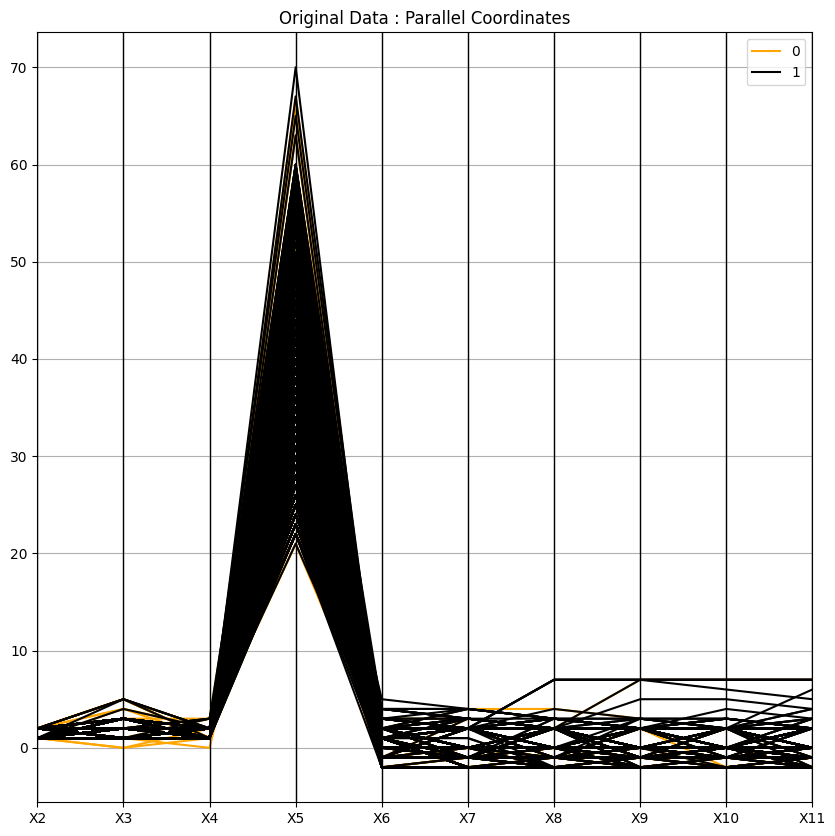

In [244]:
# Creating the parallel coordinates plots for the original data
plt.subplots(figsize=(10,10))
plt.title('Original Data : Parallel Coordinates')
parallel_coordinates(DCCC_P_C, 'Y', color=['orange','black'])

<Axes: title={'center': 'Scaled Data : Parallel Coordinates'}>

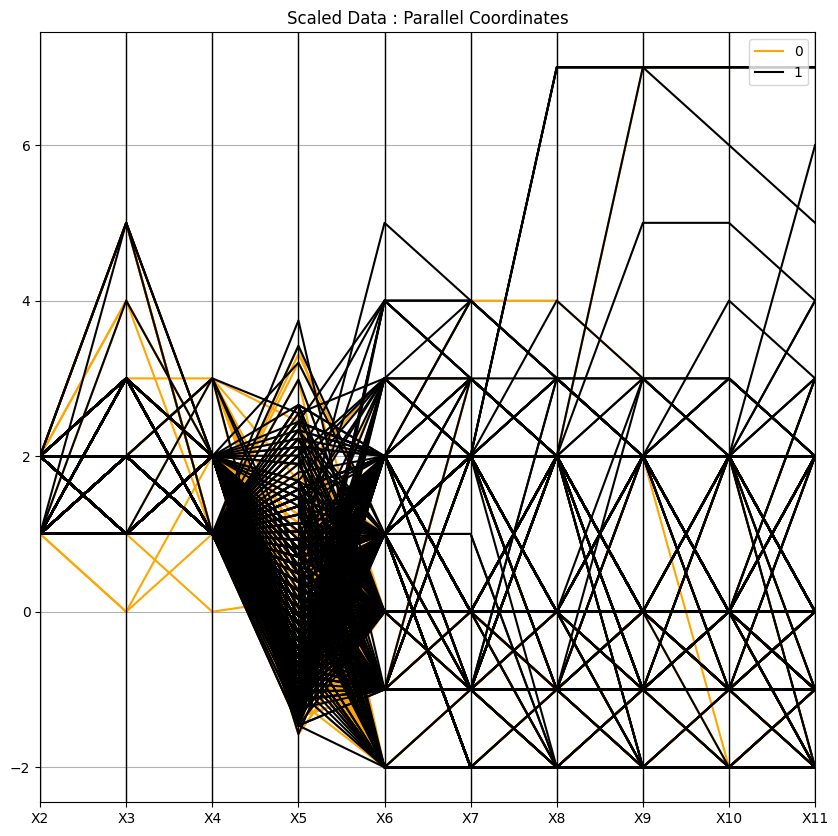

In [245]:
# Creating the parallel coordinates plots for the scaled data
plt.subplots(figsize=(10,10))
plt.title('Scaled Data : Parallel Coordinates')
parallel_coordinates(DCCC_P_C_S, 'Y', color=['orange','black'])

In [246]:
DCCC_Sample.columns = DCCC_Copy.columns.droplevel(1)
# Performing the Principal Component Analysis (PCA) with 2 components
pca = PCA(2)
Data_Set_pca = pca.fit_transform(DCCC_Sample)
Data_Frame_pca = pd.DataFrame(Data_Set_pca, columns=['PC1', 'PC2'])
Data_Frame_pca.index = DCCC_Sample.index
Data_Set_pca_final = pd.concat([Data_Frame_pca, DCCC_Sample['Y']], axis=1)

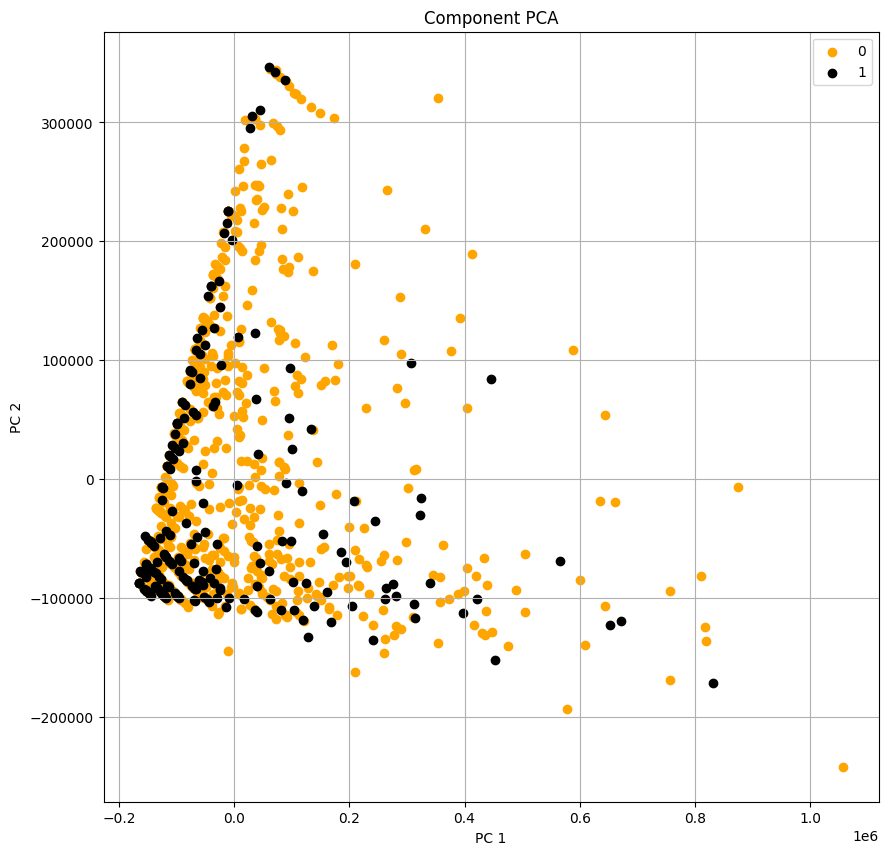

In [247]:
# Creating a scatter plot for the PCA components
Fig_pca, Ax_pca = plt.subplots(1, 1, figsize=(10, 10))
Ax_pca.set_xlabel('PC 1')
Ax_pca.set_ylabel('PC 2')
Ax_pca.set_title('Component PCA')
classes = DCCC_Sample['Y'].unique().tolist()
colors = ['orange', 'black']

S_D = [(Data_Set_pca_final['Y'] == classe, classe, color) for classe, color in zip(classes, colors)]

for condition, classe, color in S_D:
    Ax_pca.scatter(
        Data_Set_pca_final.loc[condition, 'PC1'],
        Data_Set_pca_final.loc[condition, 'PC2'],
        c=color,
        label=classe
    )

Ax_pca.legend()
Ax_pca.grid()

plt.show()